In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import scipy
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')
import re

In [2]:
data = pd.read_csv("Dataset/final_data.csv")

***Features Information***
- ARTIST: The name of the artist.

- TRACK_NAME: The name of the track.

- TRACK_ID: The Spotify ID for the track.

- ACOUSTICNESS: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


- DANCEABILITY: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity

- ENERGY: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy.

- KEY: The key the track is in. Integers map to pitches using standard Pitch Class notation. 

- LOUDNESS:The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

- MODE: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

- SPEECHINESS: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 

- INSTRUMENTALNESS: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 

- LIVENESS: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- VALENCE: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- TEMPO: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- DURATION_MS: The duration of track in milli-seconds

- POPULARITY: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

# Basic EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289327 entries, 0 to 289326
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            289326 non-null  object 
 1   track_name        289326 non-null  object 
 2   track_id          289327 non-null  object 
 3   acousticness      284653 non-null  float64
 4   danceability      289327 non-null  float64
 5   energy            289327 non-null  float64
 6   key               289327 non-null  int64  
 7   loudness          289327 non-null  float64
 8   mode              289327 non-null  int64  
 9   speechiness       289327 non-null  float64
 10  instrumentalness  289327 non-null  float64
 11  liveness          289327 non-null  float64
 12  valence           289327 non-null  float64
 13  tempo             289327 non-null  float64
 14  duration_ms       289327 non-null  int64  
 15  popularity        284653 non-null  float64
dtypes: float64(10), int6

In [13]:
print(f"The Number of rows in the dataset : {data.shape[0]}")
print(f"The Number of columns in the dataset : {data.shape[1]}")

The Number of rows in the dataset : 289327
The Number of columns in the dataset : 16


In [31]:
data.head(5)

,artist,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
0,Yuvan Shankar Raja,Idhu Varai,6dZCuf6SGn2rh9q94JBLlv,NaN,0.670,0.517,5,-6.963,0,0.0390,0.000025,0.2170,0.615,77.514,284480,NaN
1,Yuvan Shankar Raja,Yenga Area,5qP6NsmHHTpgFZ23KezwVG,NaN,0.550,0.900,5,-6.845,0,0.0948,0.003390,0.3990,0.778,129.916,316093,NaN
2,Yuvan Shankar Raja,Yedho Ondru Ennai,3c1tJAYgROZEdqRfm7Wsny,NaN,0.858,0.447,10,-7.917,1,0.0343,0.000092,0.0738,0.256,119.980,213520,NaN
3,Various Artists,Devathaiya Kandein,7F6S2iyZaDS7AThJaHftJI,NaN,0.879,0.434,7,-10.778,0,0.0385,0.000025,0.1050,0.794,110.018,310613,NaN
4,Yuvan Shankar Raja,Paathagathi Kannupattu,6HUBMSP66XE9nWMoMYhqo1,NaN,0.836,0.541,3,-7.134,0,0.0374,0.013200,0.0867,0.452,142.358,270813,NaN


In [32]:
data.tail(5)

,artist,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
289322,Rainy Lullaby,Sleep My Little Boy,2C3TZjDRiAzdyViavDJ217,0.640,0.172,0.235,5,-16.393,1,0.0422,0.928,0.0863,0.0339,125.995,384999,21.0
289323,Rainy Lullaby,Water Into Light,1hIz5L4IB9hN3WRYPOCGPw,0.994,0.174,0.117,0,-18.318,0,0.0401,0.976,0.1050,0.0350,85.239,385000,22.0
289324,Cesária Evora,Miss Perfumado,6x8ZfSoqDjuNa5SVP5QjvX,0.867,0.629,0.329,0,-10.895,0,0.0420,0.000,0.0839,0.7430,132.378,271466,22.0
289325,Michael W. Smith,Friends,2e6sXL2bYv4bSz6VTdnfLs,0.381,0.587,0.506,7,-10.889,1,0.0297,0.000,0.2700,0.4130,135.960,283893,41.0
289326,Cesária Evora,Barbincor,2hETkH7cOfqmz3LqZDHZf5,0.681,0.526,0.487,1,-10.204,0,0.0725,0.000,0.0893,0.7080,79.198,241826,22.0


In [33]:
data.columns

Index(['artist', 'track_name', 'track_id', 'acousticness', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'popularity'],
      dtype='object')

In [30]:
data.describe().round(3)

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,284653.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,289327.000,284653.000
mean,0.427,0.551,0.548,5.244,-10.131,0.676,0.093,0.161,0.208,0.506,119.021,229736.568,32.155
std,0.371,0.176,0.272,3.534,5.645,0.468,0.142,0.311,0.181,0.262,30.506,118412.747,22.037
min,0.000,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.050,0.432,0.322,2.000,-13.011,0.000,0.035,0.000,0.098,0.293,95.391,171693.000,14.000
50%,0.349,0.563,0.565,5.000,-8.881,1.000,0.047,0.000,0.134,0.509,118.017,210023.000,34.000
75%,0.807,0.682,0.782,8.000,-5.961,1.000,0.080,0.075,0.265,0.721,137.988,262107.000,49.000
max,0.996,0.988,1.000,11.000,4.532,1.000,0.970,1.000,1.000,1.000,243.507,5403500.000,100.000


## Data Cleaning

### Missing Value Analysis

In [9]:
def missing_values(df):
    return df.isna().sum(axis = 0) / len(df) * 100

In [51]:
missing_values(data).round(2)

artist              0.00
track_name          0.00
track_id            0.00
acousticness        1.62
danceability        0.00
energy              0.00
key                 0.00
loudness            0.00
mode                0.00
speechiness         0.00
instrumentalness    0.00
liveness            0.00
valence             0.00
tempo               0.00
duration_ms         0.00
popularity          1.62
dtype: float64

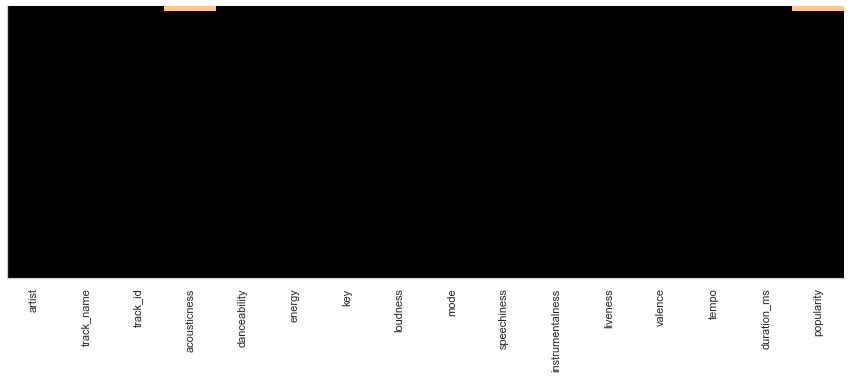

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False , yticklabels=False,cmap= 'copper')
sns.despine()

From the above analysis we can find that only 1 percentage of  has records having Null value

In [3]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

imputed_data = imputer.fit_transform(data[['acousticness']])

In [4]:
data['acousticness'] = pd.DataFrame(imputed_data, columns=['acousticness'])

In [5]:
imputed_data = imputer.fit_transform(data[['popularity']])

In [6]:
data['popularity'] = pd.DataFrame(imputed_data.round(0))

In [10]:
missing_values(data)

artist              0.000346
track_name          0.000346
track_id            0.000000
acousticness        0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
duration_ms         0.000000
popularity          0.000000
dtype: float64

In [100]:
data[data['artist'].isna()]

,artist,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
241227,NaN,NaN,1kR4gIb7nGxHPI3D2ifs59,0.69,0.501,0.583,7,-9.46,0,0.0605,0.00396,0.0747,0.734,138.391,0,0.0


In [104]:
data = data.dropna(how='any')
data.reset_index(drop=True,inplace= True)

In [110]:
missing_values(data)

artist              0.0
track_name          0.0
track_id            0.0
acousticness        0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
popularity          0.0
dtype: float64

In [223]:
data.drop(columns= ['track_id'], inplace=True)

We will take numerical features to visualize the data 

In [108]:
numerical = data.select_dtypes(exclude= 'object')

In [109]:
numerical.head(3)

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
0,0.427142,0.670,0.517,5,-6.963,0,0.0390,0.000025,0.2170,0.615,77.514,284480,32.0
1,0.427142,0.550,0.900,5,-6.845,0,0.0948,0.003390,0.3990,0.778,129.916,316093,32.0
2,0.427142,0.858,0.447,10,-7.917,1,0.0343,0.000092,0.0738,0.256,119.980,213520,32.0


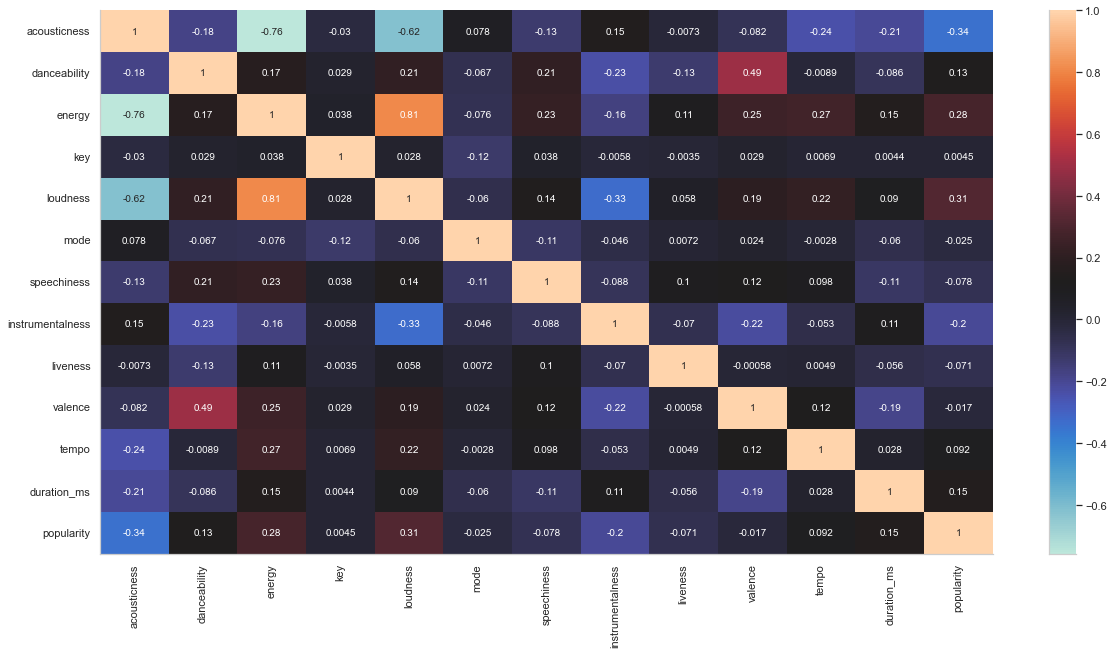

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical.corr(method='spearman'), annot = True, cmap ='icefire')
sns.despine()

In [29]:
numerical.corr(method= 'spearman')

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
acousticness,1.000000,-0.175625,-0.759532,-0.029826,-0.615979,0.077639,-0.132173,0.147470,-0.007317,-0.082235,-0.238402,-0.208305,-0.341509
danceability,-0.175625,1.000000,0.169456,0.029374,0.210931,-0.067123,0.214785,-0.230685,-0.128015,0.492671,-0.008927,-0.086194,0.129240
energy,-0.759532,0.169456,1.000000,0.037971,0.810984,-0.076146,0.227667,-0.164858,0.105828,0.254919,0.265351,0.149913,0.279534
key,-0.029826,0.029374,0.037971,1.000000,0.027906,-0.123576,0.037839,-0.005786,-0.003460,0.028531,0.006900,0.004407,0.004471
loudness,-0.615979,0.210931,0.810984,0.027906,1.000000,-0.060358,0.136688,-0.332653,0.057885,0.193904,0.217905,0.089646,0.313042
mode,0.077639,-0.067123,-0.076146,-0.123576,-0.060358,1.000000,-0.111480,-0.046461,0.007190,0.024232,-0.002844,-0.059995,-0.024953
speechiness,-0.132173,0.214785,0.227667,0.037839,0.136688,-0.111480,1.000000,-0.087874,0.103354,0.119476,0.098369,-0.106757,-0.077691
instrumentalness,0.147470,-0.230685,-0.164858,-0.005786,-0.332653,-0.046461,-0.087874,1.000000,-0.070470,-0.219561,-0.052583,0.110499,-0.204992
liveness,-0.007317,-0.128015,0.105828,-0.003460,0.057885,0.007190,0.103354,-0.070470,1.000000,-0.000585,0.004871,-0.056215,-0.071141
valence,-0.082235,0.492671,0.254919,0.028531,0.193904,0.024232,0.119476,-0.219561,-0.000585,1.000000,0.115563,-0.188571,-0.017180


From the above observation we can find some insights:
- The tracks that are energetic are equally louder.
- The louder tracks have less probability of being acoustic track.

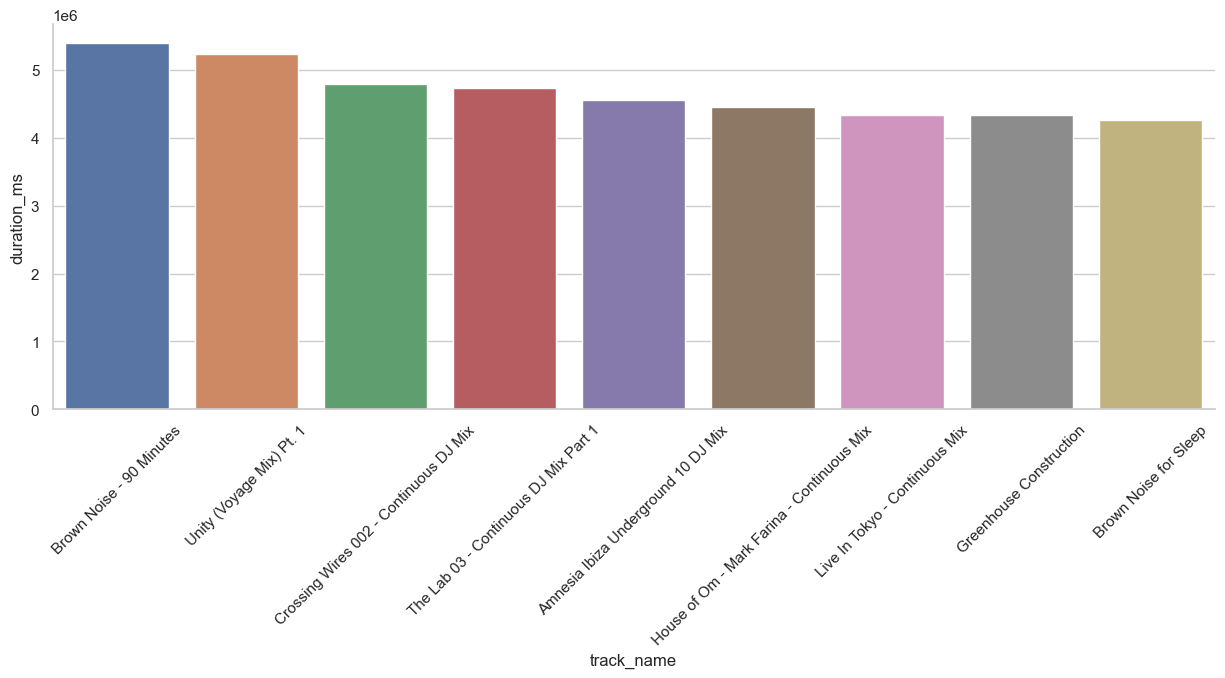

In [123]:
longest_songs = data[['artist','track_name','duration_ms']].sort_values(by='duration_ms', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='duration_ms', data= longest_songs)
plt.xticks(rotation = 45)
sns.despine()

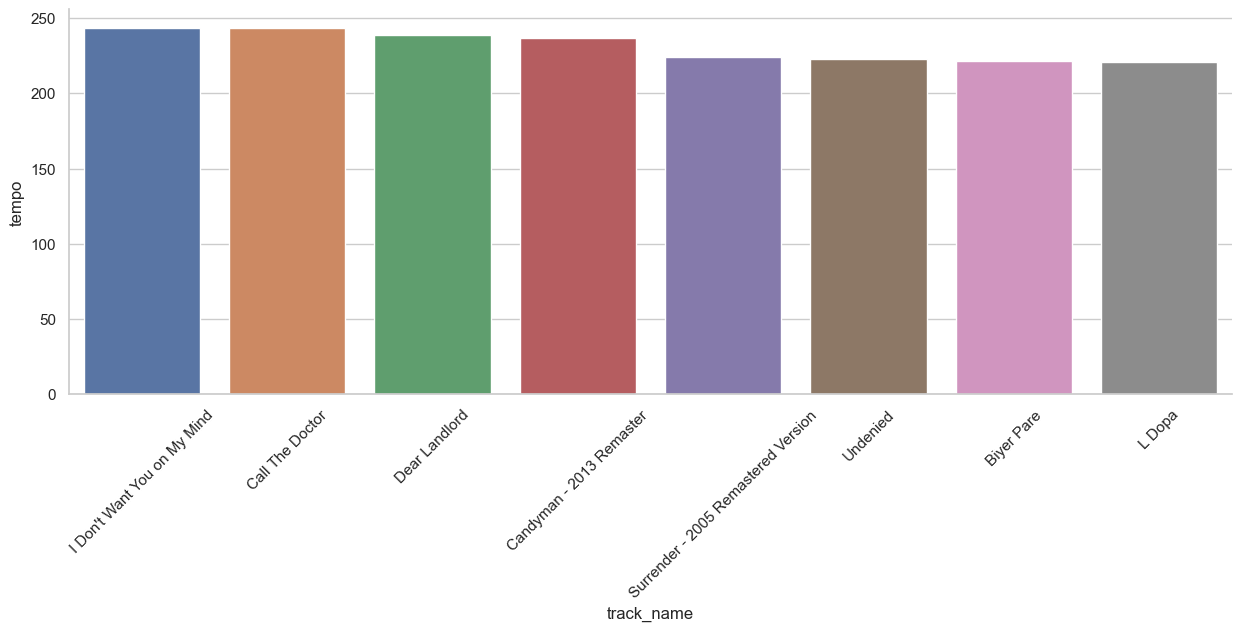

In [128]:
fast_tempo_songs = data[['artist','track_name','tempo']].sort_values(by='tempo', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='tempo', data= fast_tempo_songs)
plt.xticks(rotation = 45)
sns.despine()

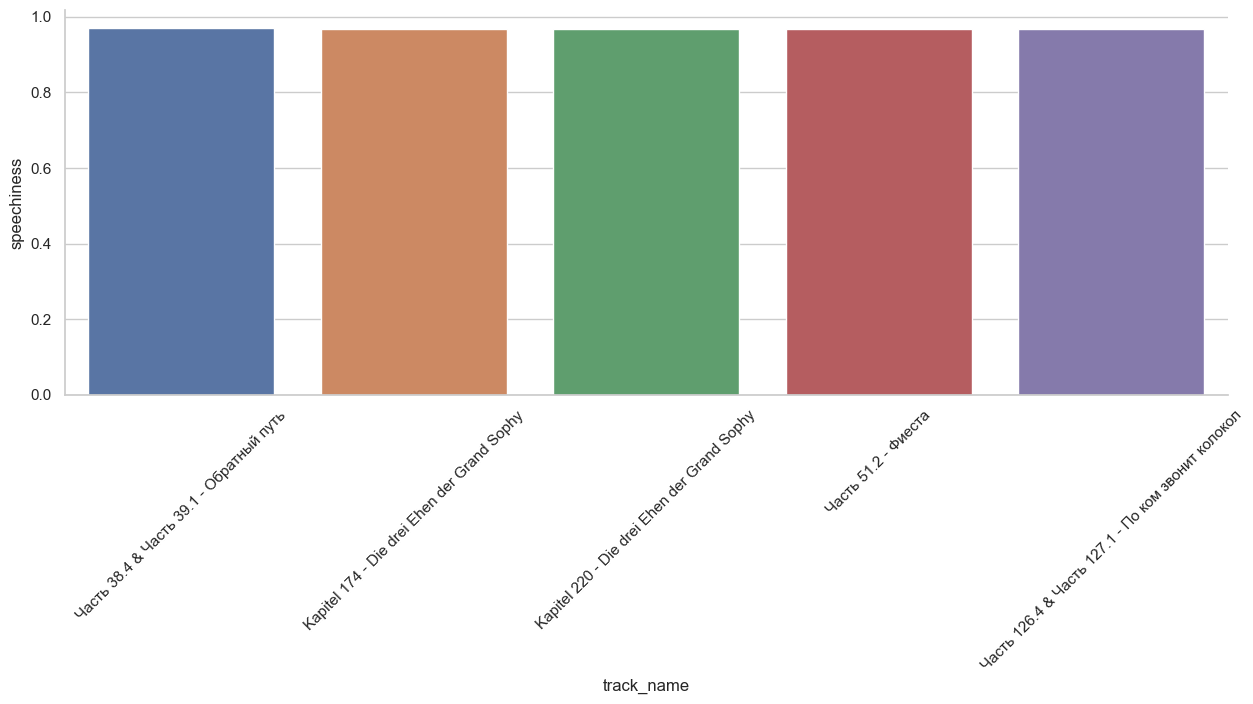

In [135]:
high_speech_songs = data[['artist','track_name','speechiness']].sort_values(by='speechiness', ascending=False)[:5]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='speechiness', data= high_speech_songs)
plt.xticks(rotation = 45)
sns.despine()

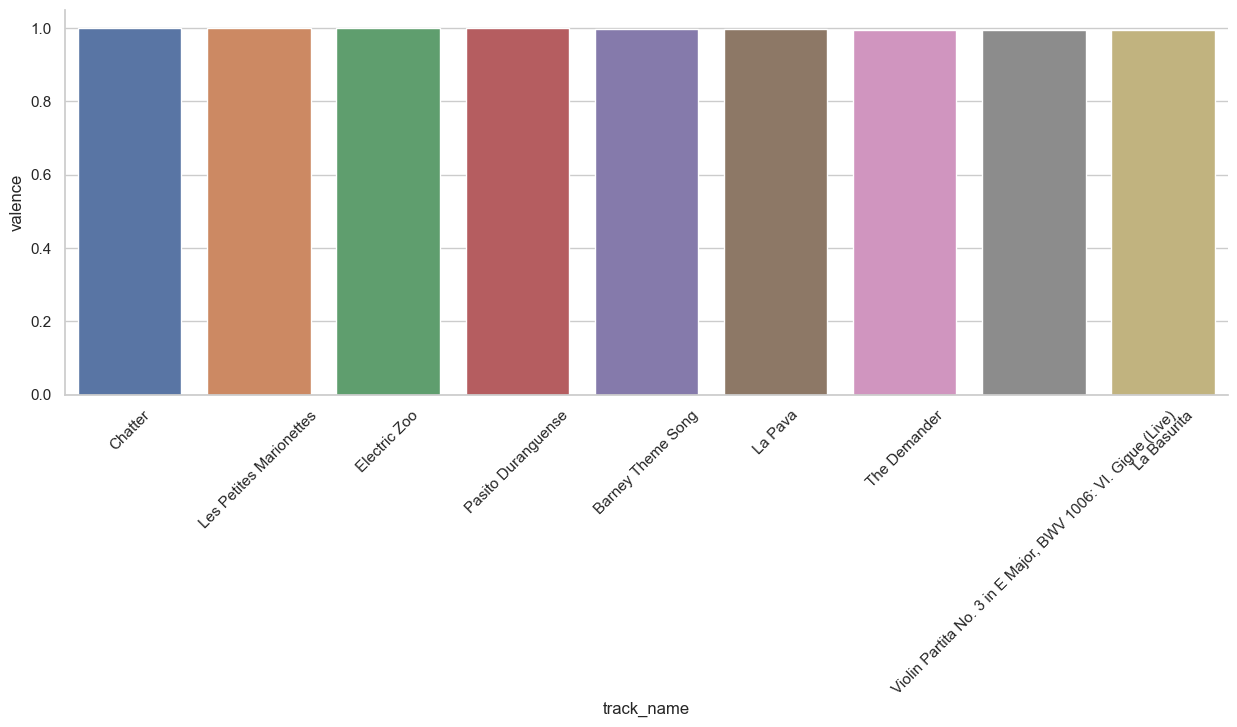

In [138]:
high_valence_songs = data[['artist','track_name','valence']].sort_values(by='valence', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='valence', data= high_valence_songs)
plt.xticks(rotation = 45)
sns.despine()

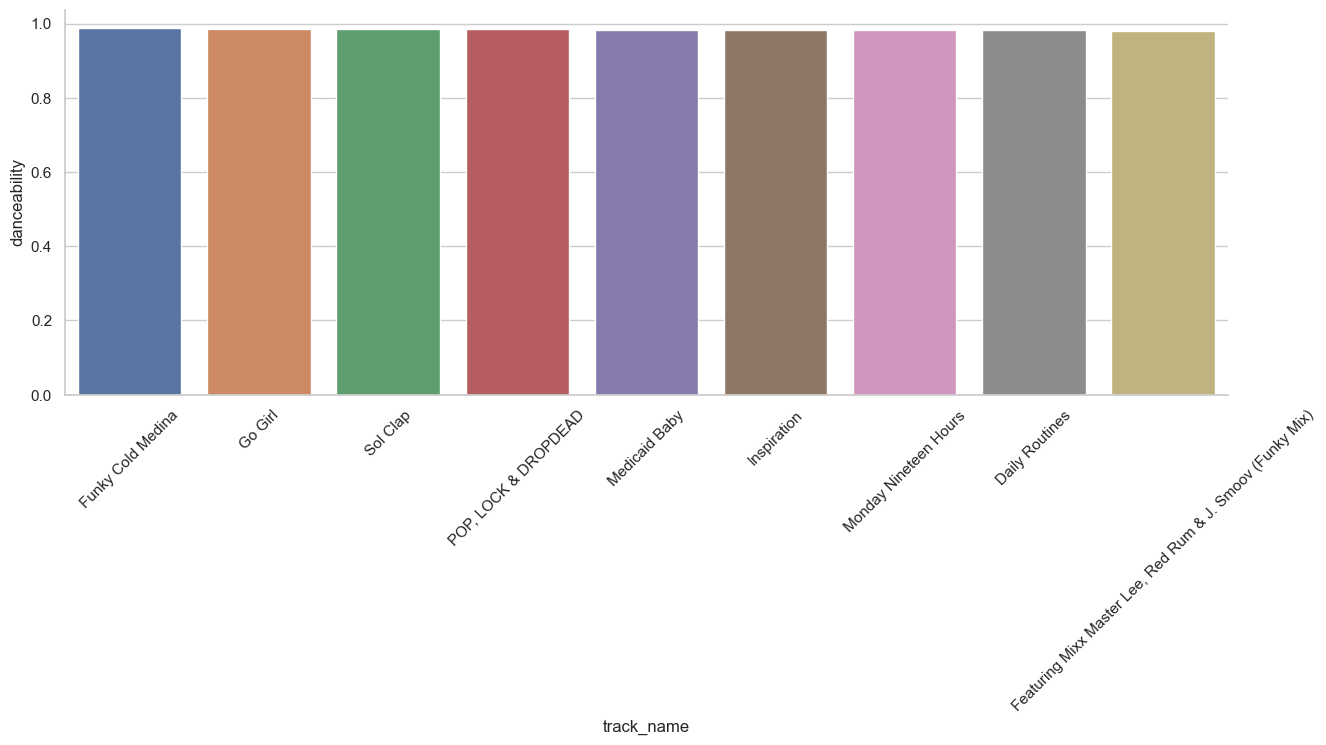

In [141]:
high_danceable_songs = data[['artist','track_name','danceability']].sort_values(by='danceability', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='danceability', data= high_danceable_songs)
plt.xticks(rotation = 45)
sns.despine()

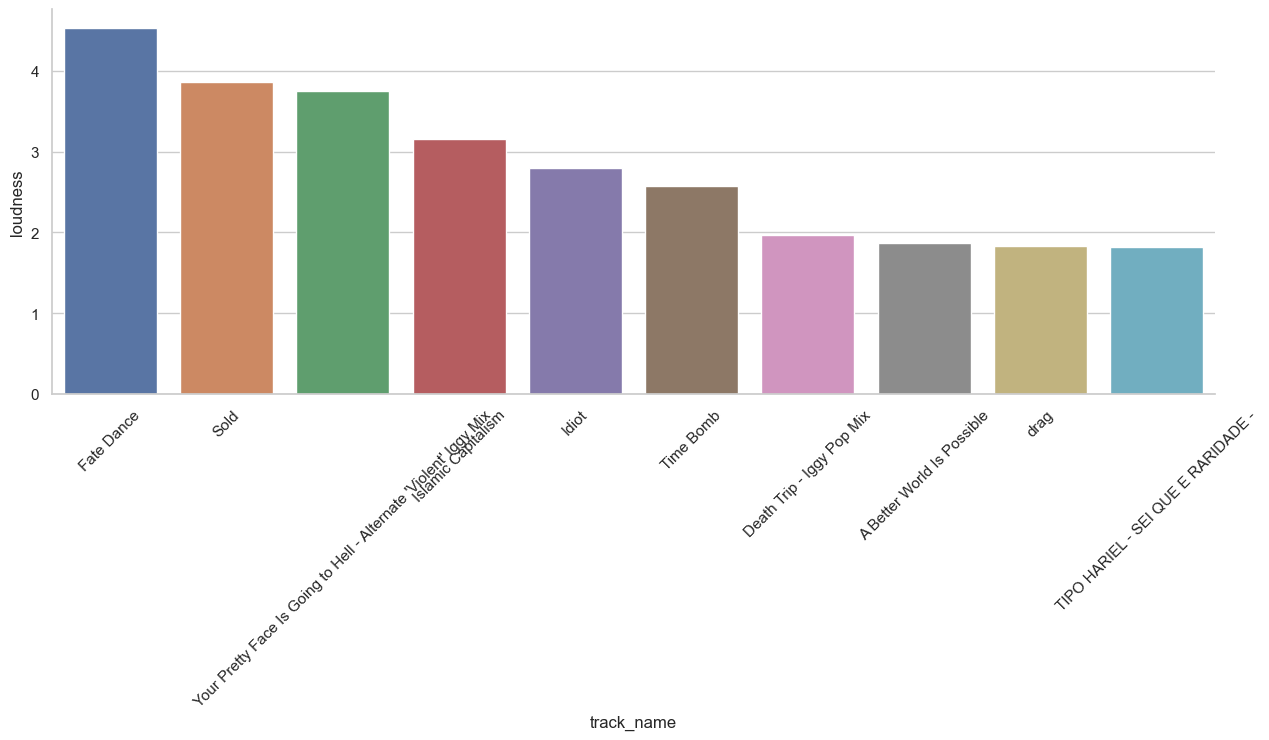

In [142]:
loudest_songs = data[['artist','track_name','loudness']].sort_values(by='loudness', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='loudness', data= loudest_songs)
plt.xticks(rotation = 45)
sns.despine()
#these tracks are loudest 

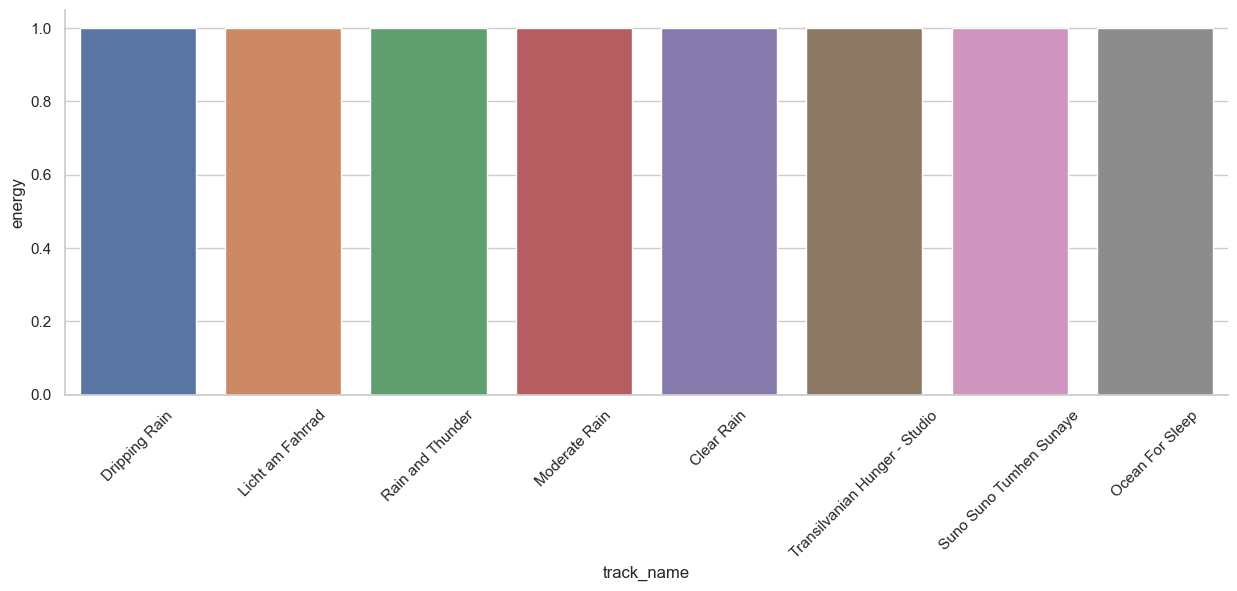

In [148]:
high_energy_songs = data[['artist','track_name','energy']].sort_values(by='energy', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='energy', data= high_energy_songs)
plt.xticks(rotation = 45)
sns.despine()
# these tracks are the most energetic songs

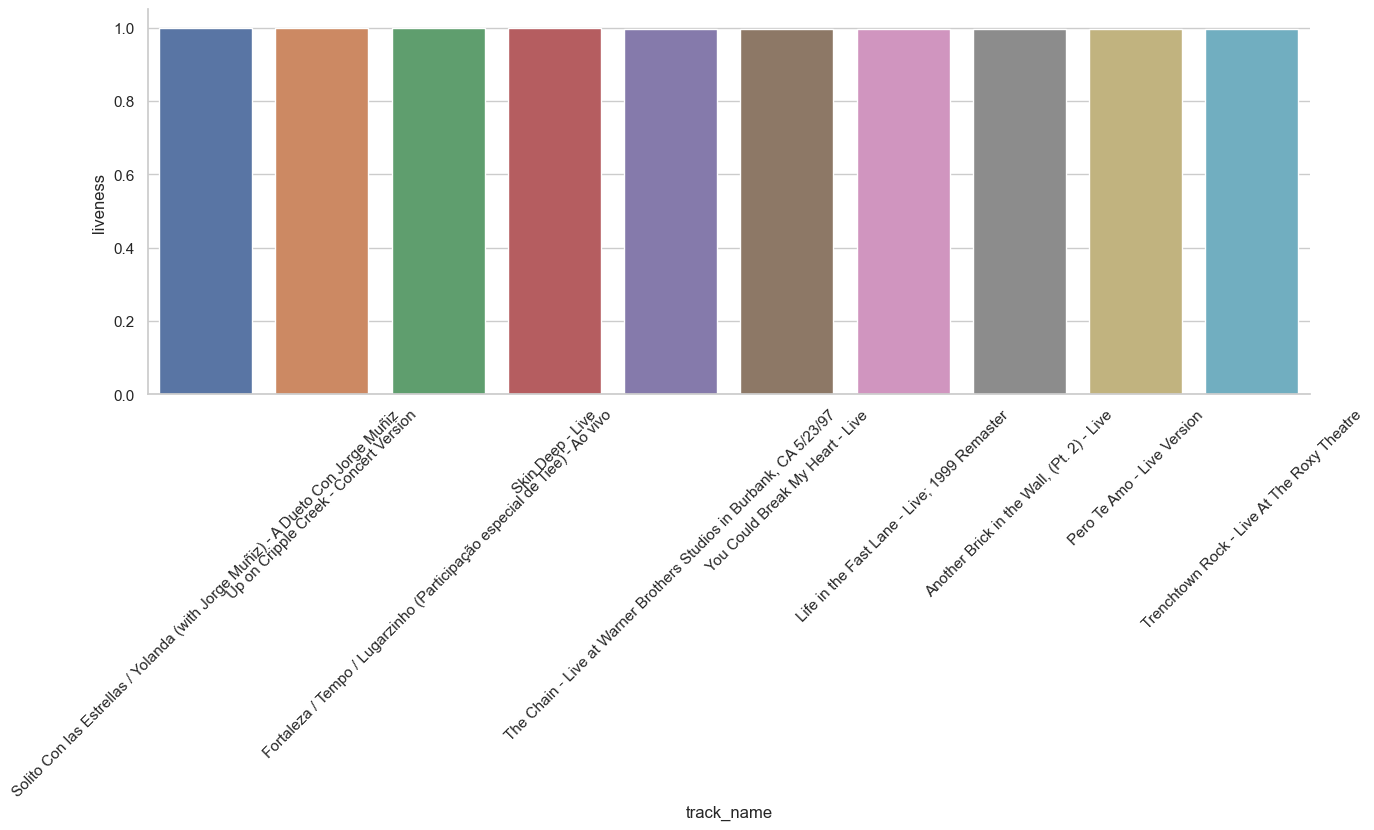

In [144]:
live_songs = data[['artist','track_name','liveness']].sort_values(by='liveness', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='liveness', data= live_songs)
plt.xticks(rotation = 45)
sns.despine()

#These songs are performed in live

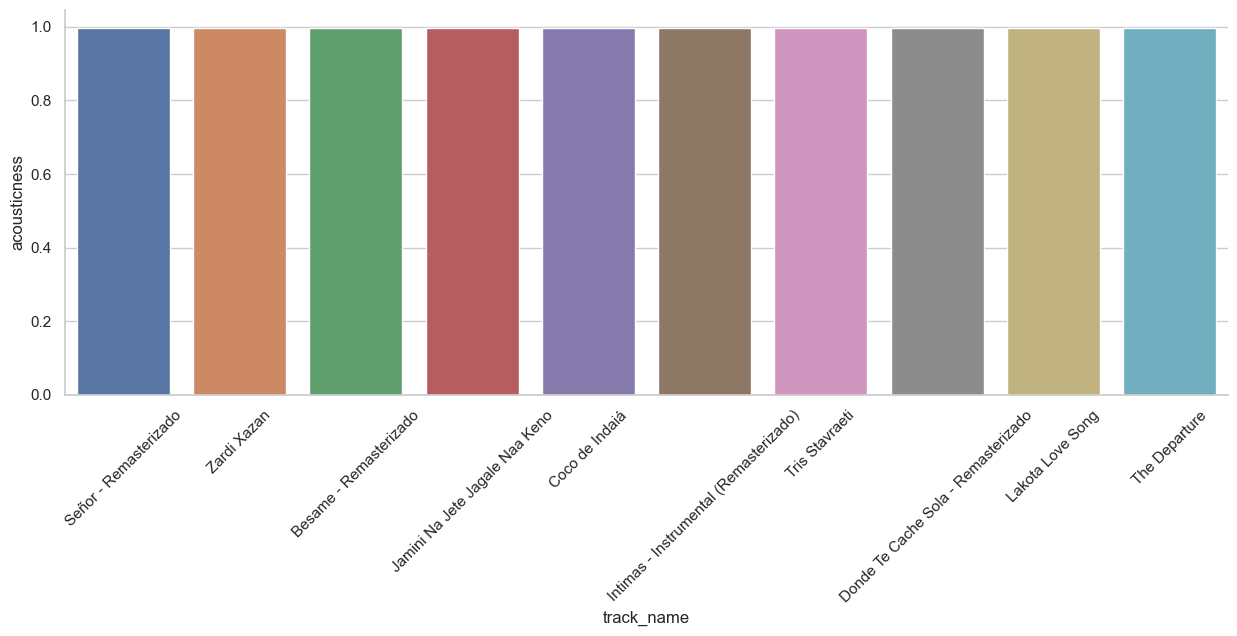

In [147]:
acoustic_songs = data[['artist','track_name','acousticness']].sort_values(by='acousticness', ascending=False)[:10]
plt.figure(figsize= (15,5))
sns.barplot(x= 'track_name', y='acousticness', data= acoustic_songs)
plt.xticks(rotation = 45)
sns.despine()

#These songs are acoustic 

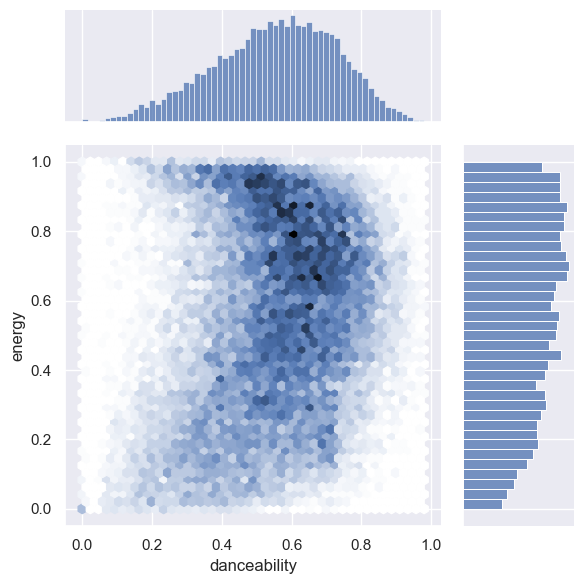

In [209]:
sns.jointplot(x="danceability", y="energy", data=numerical.sample(30000), kind='hex', ratio =3);
# From this we can find that there is no clear correlation between the variables

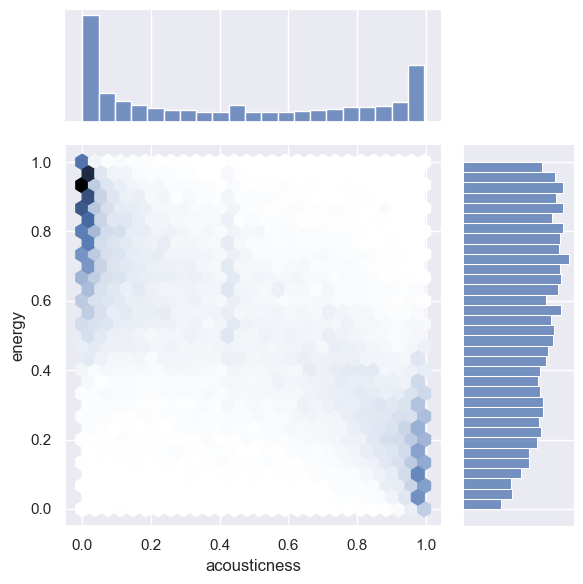

In [203]:
sns.jointplot(x="acousticness", y="energy", data=numerical.sample(30000), kind='hex', ratio=3);
# from this plot we can tell that the less acoustic songs are more energytic and more acoustic songs are less energetic

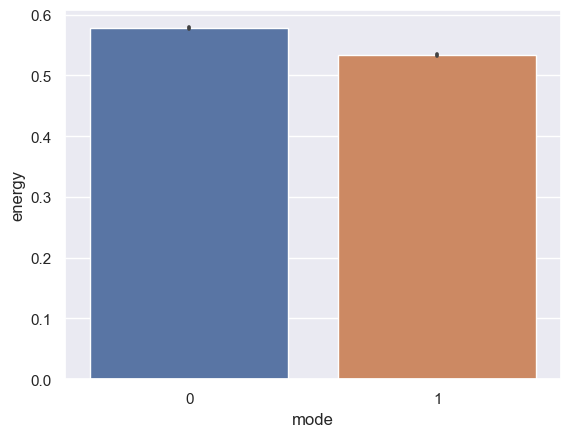

In [218]:
sns.barplot(x='mode', y='energy', data = numerical);
# From this plot we can tell that the less melodies songs are more energetic

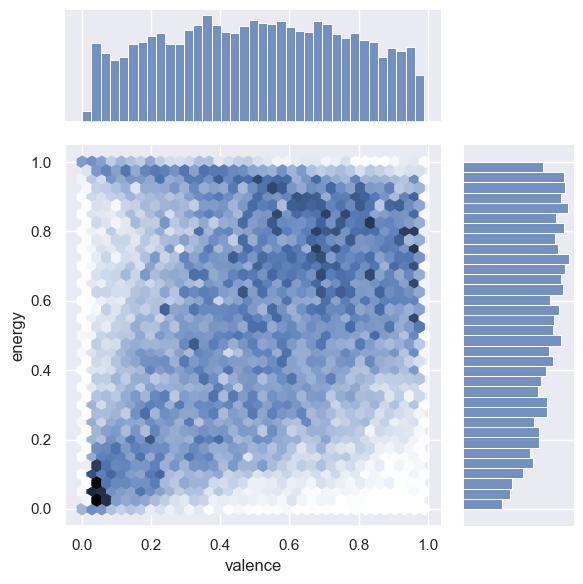

In [213]:
sns.jointplot(x="valence", y="energy", data=numerical.sample(30000), kind='hex', ratio=3);
# There is no clear distribution on this plot too 

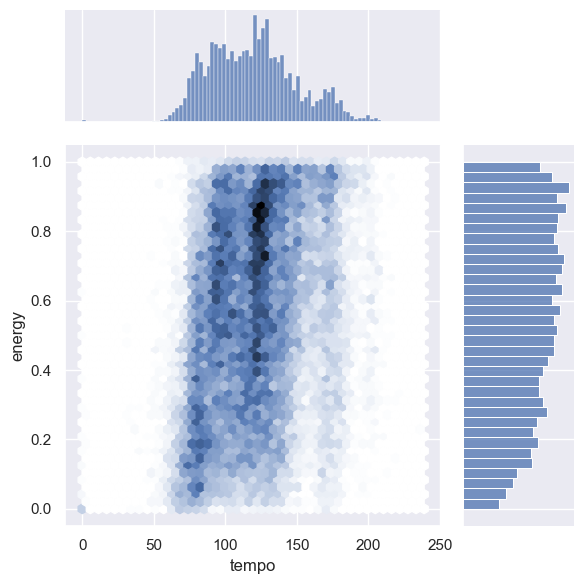

In [214]:
sns.jointplot(x="tempo", y="energy", data=numerical.sample(30000), kind='hex', ratio=3);

In [434]:
#Cleaning artist name column
names = data.artist.str.replace("[&,:;'.-]",",")
temp = [name.split(',') for name in names]
new_lst = [temp[ind][0] for ind,name in enumerate(temp)]
data['artist'] = pd.DataFrame(new_lst)


In [435]:
artist_df = pd.pivot_table(data, values='popularity', index=['artist'], aggfunc=np.mean)

artist_df.fillna(0, inplace=True)
# shortlist top 10 artist by popularity
artist_df=artist_df.sort_values(by=['popularity'], ascending=False)
artist_df.head(10)

,popularity
artist,
Bizarrap,99.00
Manuel Turizo,98.00
Rema,92.00
Luar La L,90.50
Beach Weather,90.00
Pablo Pesadilla,88.00
Yung Gravy,87.00
Benson Boone,86.00
Piso 21,85.00


In [446]:
#normalised data
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [447]:
for col in numerical.columns:
    normalize_column(col)

In [451]:
data.skew()

acousticness        0.267322
danceability       -0.298115
energy             -0.173552
key                 0.000854
loudness           -1.299912
mode               -0.751544
speechiness         4.391471
instrumentalness    1.686802
liveness            2.144924
valence            -0.014764
tempo               0.355986
duration_ms         8.518783
popularity          0.020189
dtype: float64

In [436]:
data.to_csv("Dataset/preprocessed_data.csv",index=False)